In [1]:
#Setting up the Python environment
%matplotlib inline
import astropy
from astropy.io import fits
import os
import numpy as np
import pylab as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0) # sets the default size for figures

In [2]:
#Defining the Plotting Function
def quickplot(input_image, xlo, xhi):
    displo = np.median(input_image)-xlo*np.std(input_image)
    disphi= np.median(input_image)+xhi*np.std(input_image)
    plt.imshow(input_image, cmap='gray',vmin=displo,vmax=disphi)
    
# Defining Function for basic statistics on the images
def quickstats(input_image):
    print ('Min:', np.min(input_image))
    print ('Max:', np.max(input_image))
    print ('Mean:', np.mean(input_image))
    print ('Median:', np.median(input_image))
    print ('Stdev:', np.std(input_image))

# T120

In [3]:
#Loading the calibration frames

bias = fits.open('./T120/master_bias.fits')
bias_data = 1.0*(bias[0].data)

dark_90s = fits.open('./T120/2022-10-25 SIMO/Dark_90s.fits')
dark_90s_data = 1.0*(dark_90s[0].data)
dark_90s_header = dark_90s[0].header

dark_180s = fits.open('./T120/2022-10-25 SIMO/Dark_180s.fits')
dark_180s_data = 1.0*(dark_180s[0].data)
dark_180s_header = dark_180s[0].header

dark_240s = fits.open('./T120/2022-10-25 SIMO/Dark_240s.fits')
dark_240s_data = 1.0*(dark_240s[0].data)
dark_240s_header = dark_240s[0].header

dark_300s = fits.open('./T120/2022-10-25 SIMO/Dark_300s.fits')
dark_300s_data = 1.0*(dark_300s[0].data)
dark_300s_header = dark_300s[0].header

flat_R = fits.open('./T120/Flat_R.fits')
flat_R_data = 1.0*(flat_R[0].data)
flat_R_header = flat_R[0].header

flat_V = fits.open('./T120/Flat_V.fits')
flat_V_data = 1.0*(flat_V[0].data)
flat_V_header = flat_V[0].header

flat_B = fits.open('./T120/Flat_B.fits')
flat_B_data = 1.0*(flat_B[0].data)
flat_B_header = flat_B[0].header

flat_O = fits.open('./T120/Flat_O.fits')
flat_O_data = 1.0*(flat_O[0].data)
flat_O_header = flat_O[0].header

flat_Ha = fits.open('./T120/Flat_Ha.fits')
flat_Ha_data = 1.0*(flat_Ha[0].data)
flat_Ha_header = flat_Ha[0].header

# R Filter Frames

In [4]:
#Opening the Light Frames
Triangle_1_R = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0001_R.fits')
Triangle_1_R_header = Triangle_1_R[0].header
Triangle_1_R_data = (Triangle_1_R[0].data) * 1.0

Triangle_2_R = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0002_R.fits')
Triangle_2_R_header = Triangle_2_R[0].header
Triangle_2_R_data = (Triangle_2_R[0].data) * 1.0

Triangle_3_R = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0003_R.fits')
Triangle_3_R_header = Triangle_3_R[0].header
Triangle_3_R_data = (Triangle_3_R[0].data) * 1.0

Triangle_4_R = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0004_R.fits')
Triangle_4_R_header = Triangle_4_R[0].header
Triangle_4_R_data = (Triangle_4_R[0].data) * 1.0

Triangle_5_R = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0005_R.fits')
Triangle_5_R_header = Triangle_5_R[0].header
Triangle_5_R_data = (Triangle_5_R[0].data) * 1.0

In [5]:
#Checking the Exposure time of the Light Frame
print('Exposure Time = ', Triangle_1_R_header['EXPTIME'])

Exposure Time =  90.0


In [13]:
#normalising Flat Field
Flat_R_norm = flat_R_data / np.median(flat_R_data)

#Stacking the Light Frames
Triangle_R_raw = (Triangle_1_R_data + Triangle_2_R_data + Triangle_3_R_data + Triangle_4_R_data + Triangle_5_R_data) / 5

#Subtracting the Scaled Dark and Bias
Triangle_R_db = Triangle_R_raw - bias_data - dark_90s_data

#Dividing by the normalised Flat Field
Triangle_R = Triangle_R_db / Flat_R_norm

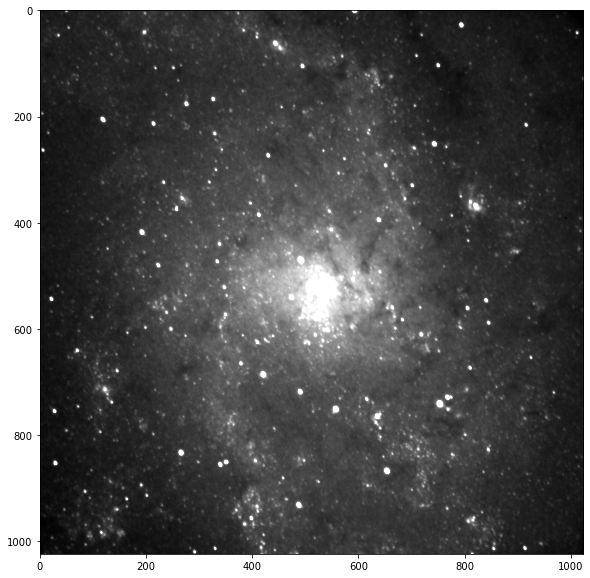

In [30]:
quickplot(Triangle_R_raw, 0.7, 2.7)

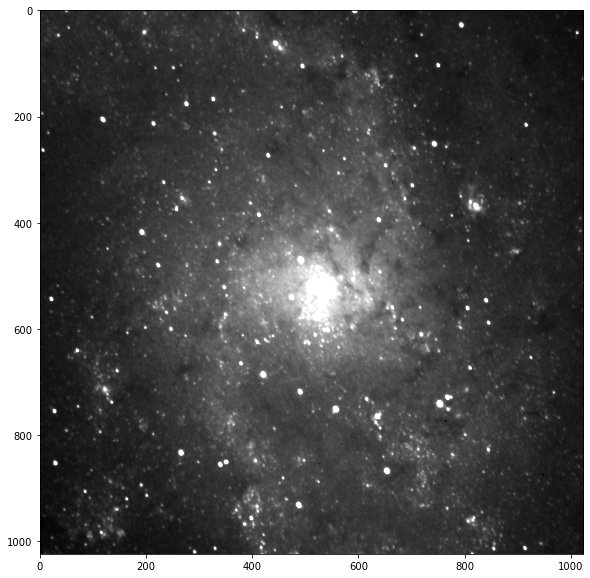

In [27]:
quickplot(Triangle_R, 0.7, 2.7)

# V Filter Frames

In [28]:
#Opening the Light Frames
Triangle_1_V = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0001_V.fits')
Triangle_1_V_header = Triangle_1_V[0].header
Triangle_1_V_data = (Triangle_1_V[0].data) * 1.0

Triangle_2_V = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0002_V.fits')
Triangle_2_V_header = Triangle_2_V[0].header
Triangle_2_V_data = (Triangle_2_V[0].data) * 1.0

Triangle_3_V = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0003_V.fits')
Triangle_3_V_header = Triangle_3_V[0].header
Triangle_3_V_data = (Triangle_3_V[0].data) * 1.0

Triangle_4_V = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0004_V.fits')
Triangle_4_V_header = Triangle_4_V[0].header
Triangle_4_V_data = (Triangle_4_V[0].data) * 1.0

Triangle_5_V = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0005_V.fits')
Triangle_5_V_header = Triangle_5_V[0].header
Triangle_5_V_data = (Triangle_5_V[0].data) * 1.0

In [29]:
#Checking the Exposure time of the Light Frame
print('Exposure Time = ', Triangle_1_R_header['EXPTIME'])

Exposure Time =  90.0


In [31]:
#normalising Flat Field
Flat_V_norm = flat_V_data / np.median(flat_V_data)

#Stacking the Light Frames
Triangle_V_raw = (Triangle_1_V_data + Triangle_2_V_data + Triangle_3_V_data + Triangle_4_V_data + Triangle_5_V_data) / 5

#Subtracting the Scaled Dark and Bias
Triangle_V_db = Triangle_V_raw - bias_data - dark_90s_data

#Dividing by the normalised Flat Field
Triangle_V = Triangle_V_db / Flat_V_norm

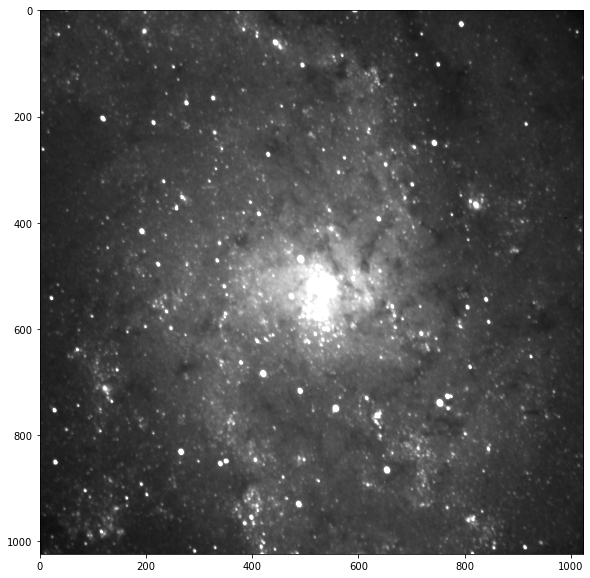

In [32]:
quickplot(Triangle_V_raw, 1, 3)

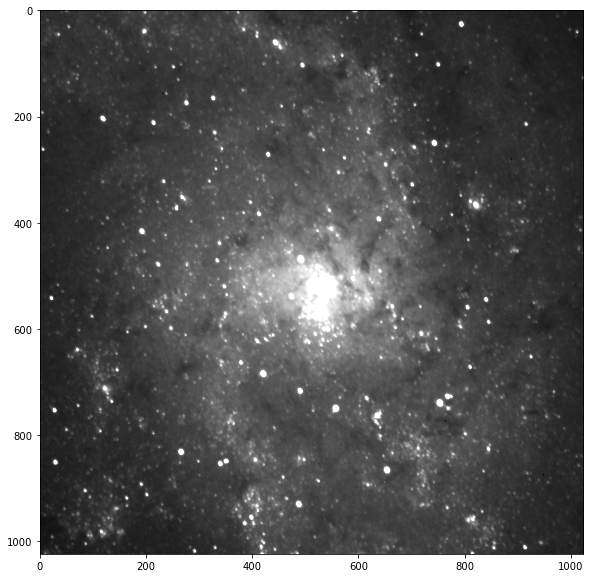

In [33]:
quickplot(Triangle_V, 1, 3)

# B Filter Frames

In [34]:
#Opening the Light Frames
Triangle_1_B = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0001_B.fits')
Triangle_1_B_header = Triangle_1_B[0].header
Triangle_1_B_data = (Triangle_1_B[0].data) * 1.0

Triangle_2_B = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0002_B.fits')
Triangle_2_B_header = Triangle_2_B[0].header
Triangle_2_B_data = (Triangle_2_B[0].data) * 1.0

Triangle_3_B = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0003_B.fits')
Triangle_3_B_header = Triangle_3_B[0].header
Triangle_3_B_data = (Triangle_3_B[0].data) * 1.0

Triangle_4_B = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0004_B.fits')
Triangle_4_B_header = Triangle_4_B[0].header
Triangle_4_B_data = (Triangle_4_B[0].data) * 1.0

Triangle_5_B = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0005_B.fits')
Triangle_5_B_header = Triangle_5_B[0].header
Triangle_5_B_data = (Triangle_5_B[0].data) * 1.0

In [35]:
#Checking the Exposure time of the Light Frame
print('Exposure Time = ', Triangle_1_B_header['EXPTIME'])

Exposure Time =  180.0


In [36]:
#normalising Flat Field
Flat_B_norm = flat_B_data / np.median(flat_B_data)

#Stacking the Light Frames
Triangle_B_raw = (Triangle_1_B_data + Triangle_2_B_data + Triangle_3_B_data + Triangle_4_B_data + Triangle_5_B_data) / 5

#Subtracting the Scaled Dark and Bias
Triangle_B_db = Triangle_B_raw - bias_data - dark_180s_data

#DiBiding by the normalised Flat Field
Triangle_B = Triangle_B_db / Flat_B_norm

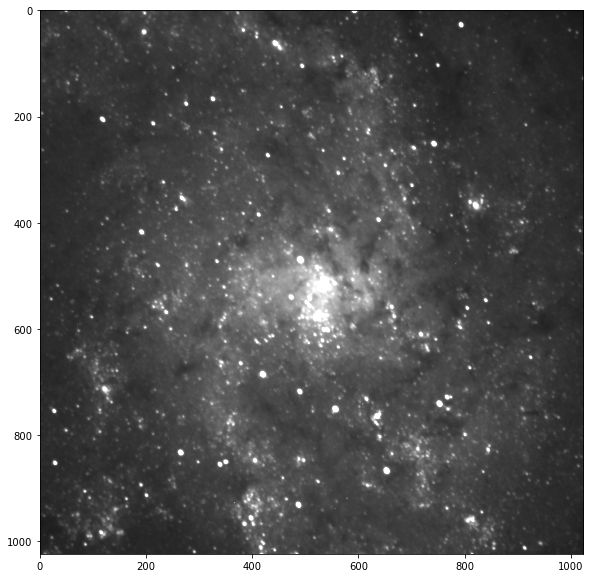

In [37]:
quickplot(Triangle_B_raw, 1, 3)

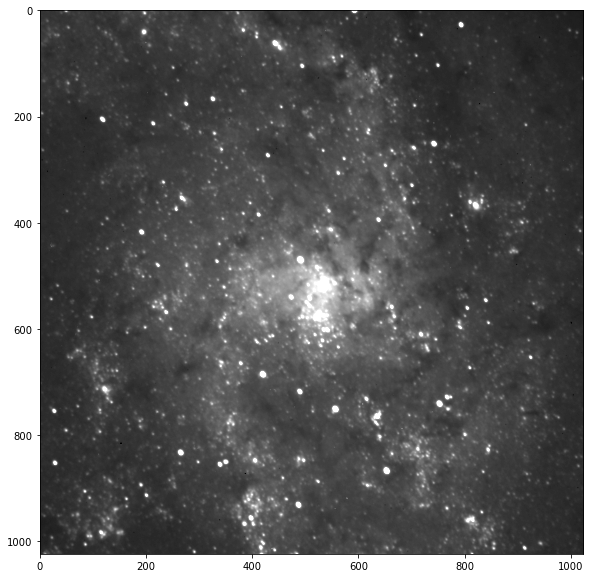

In [38]:
quickplot(Triangle_B, 1, 3)

# Ha Filter Frames

In [39]:
#Opening the Light Frames
Triangle_1_Ha = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0001_Ha.fits')
Triangle_1_Ha_header = Triangle_1_Ha[0].header
Triangle_1_Ha_data = (Triangle_1_Ha[0].data) * 1.0

Triangle_2_Ha = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0002_Ha.fits')
Triangle_2_Ha_header = Triangle_2_Ha[0].header
Triangle_2_Ha_data = (Triangle_2_Ha[0].data) * 1.0

Triangle_3_Ha = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0003_Ha.fits')
Triangle_3_Ha_header = Triangle_3_Ha[0].header
Triangle_3_Ha_data = (Triangle_3_Ha[0].data) * 1.0

Triangle_4_Ha = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0004_Ha.fits')
Triangle_4_Ha_header = Triangle_4_Ha[0].header
Triangle_4_Ha_data = (Triangle_4_Ha[0].data) * 1.0

Triangle_5_Ha = fits.open('./T120/2022-10-25 SIMO/Triangle/M33-0005_Ha.fits')
Triangle_5_Ha_header = Triangle_5_Ha[0].header
Triangle_5_Ha_data = (Triangle_5_Ha[0].data) * 1.0

In [40]:
#Checking the Exposure time of the Light Frame
print('Exposure Time = ', Triangle_1_Ha_header['EXPTIME'])

Exposure Time =  300.0


In [65]:
#normalising Flat Field
Flat_Ha_norm = flat_Ha_data / np.median(flat_Ha_data)

#Stacking the Light Frames
Triangle_Ha_raw = (Triangle_1_Ha_data + Triangle_2_Ha_data + Triangle_3_Ha_data + Triangle_4_Ha_data + Triangle_5_Ha_data) / 5

#Subtracting the Scaled Dark and Bias
Triangle_Ha_db = Triangle_Ha_raw - bias_data - dark_300s_data

#Dividing by the normalised Flat Field
Triangle_Ha = Triangle_Ha_db / Flat_Ha_norm

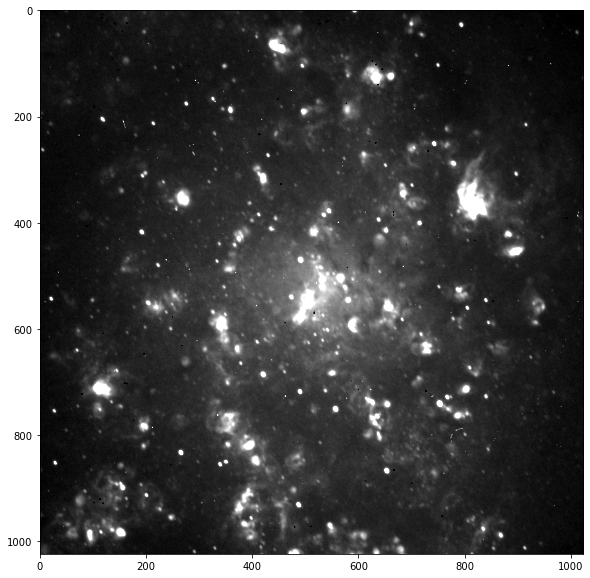

In [66]:
quickplot(Triangle_Ha_db, 0.5, 3)

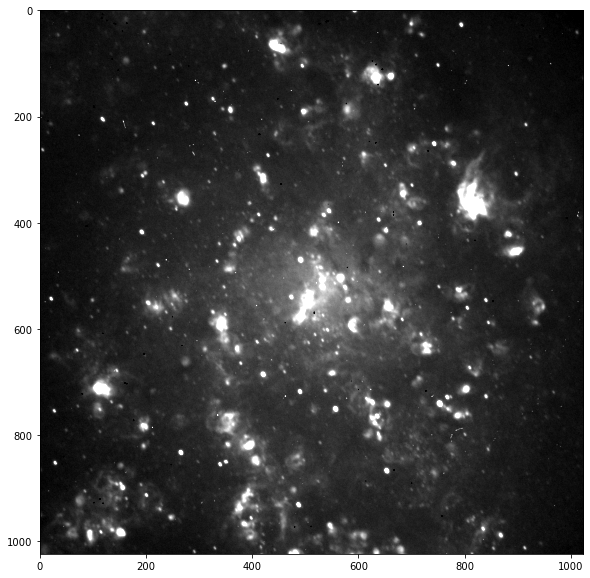

In [67]:
quickplot(Triangle_Ha, 0.5, 3)

# Saving Frames

In [69]:
Triangle_Ha_fit = fits.PrimaryHDU(Triangle_Ha)
Triangle_Ha_fit.writeto('./T120/Triangle_Ha.fits')

Triangle_R_fit = fits.PrimaryHDU(Triangle_R)
Triangle_R_fit.writeto('./T120/Triangle_R.fits')

Triangle_V_fit = fits.PrimaryHDU(Triangle_V)
Triangle_V_fit.writeto('./T120/Triangle_V.fits')

Triangle_B_fit = fits.PrimaryHDU(Triangle_B)
Triangle_B_fit.writeto('./T120/Triangle_B.fits')

# Little Dumbbell Nebula

In [5]:
Haltere_1_R = fits.open('./T120/2022-10-25 SIMO/Haltere/M76_R.fits')
Haltere_1_R_header = Haltere_1_R[0].header
Haltere_1_R_data = (Haltere_1_R[0].data) * 1.0

Haltere_1_V = fits.open('./T120/2022-10-25 SIMO/Haltere/M76_V.fits')
Haltere_1_V_header = Haltere_1_V[0].header
Haltere_1_V_data = (Haltere_1_V[0].data) * 1.0

Haltere_1_B = fits.open('./T120/2022-10-25 SIMO/Haltere/M76_B.fits')
Haltere_1_B_header = Haltere_1_B[0].header
Haltere_1_B_data = (Haltere_1_B[0].data) * 1.0

Haltere_1_O = fits.open('./T120/2022-10-25 SIMO/Haltere/M76_OIII.fits')
Haltere_1_O_header = Haltere_1_O[0].header
Haltere_1_O_data = (Haltere_1_O[0].data) * 1.0

Haltere_1_Ha = fits.open('./T120/2022-10-25 SIMO/Haltere/M76_Ha.fits')
Haltere_1_Ha_header = Haltere_1_Ha[0].header
Haltere_1_Ha_data = (Haltere_1_Ha[0].data) * 1.0

In [6]:
#checking Exposures
print('Exposure R = ', Haltere_1_R_header['EXPTIME'])
print('Exposure V = ', Haltere_1_V_header['EXPTIME'])
print('Exposure B = ', Haltere_1_B_header['EXPTIME'])
print('Exposure O = ', Haltere_1_O_header['EXPTIME'])
print('Exposure Ha = ', Haltere_1_Ha_header['EXPTIME'])

Exposure R =  120.0
Exposure V =  180.0
Exposure B =  180.0
Exposure O =  300.0
Exposure Ha =  300.0


In [7]:
#normalising Flat Fields
Flat_R_norm = flat_R_data / np.median(flat_R_data)
Flat_V_norm = flat_V_data / np.median(flat_V_data)
Flat_B_norm = flat_B_data / np.median(flat_B_data)
Flat_O_norm = flat_O_data / np.median(flat_O_data)
Flat_Ha_norm = flat_Ha_data / np.median(flat_Ha_data)

In [8]:
#Scale of dark for the R Frame
ScaleR = Haltere_1_R_header['EXPTIME'] / dark_180s_header['EXPTIME']

In [10]:
#Subtracting the Scaled Darks and Bias
Haltere_R_db = Haltere_1_R_data - bias_data - (dark_180s_data * ScaleR)
Haltere_V_db = Haltere_1_V_data - bias_data - dark_180s_data
Haltere_B_db = Haltere_1_B_data - bias_data - dark_180s_data
Haltere_O_db = Haltere_1_O_data - bias_data - dark_300s_data
Haltere_Ha_db = Haltere_1_Ha_data - bias_data - dark_300s_data

#Dividing by the normalised Flat Field
Haltere_R = Haltere_R_db / Flat_R_norm
Haltere_V = Haltere_V_db / Flat_V_norm
Haltere_B = Haltere_B_db / Flat_B_norm
Haltere_O = Haltere_O_db / Flat_O_norm
Haltere_Ha = Haltere_Ha_db / Flat_Ha_norm

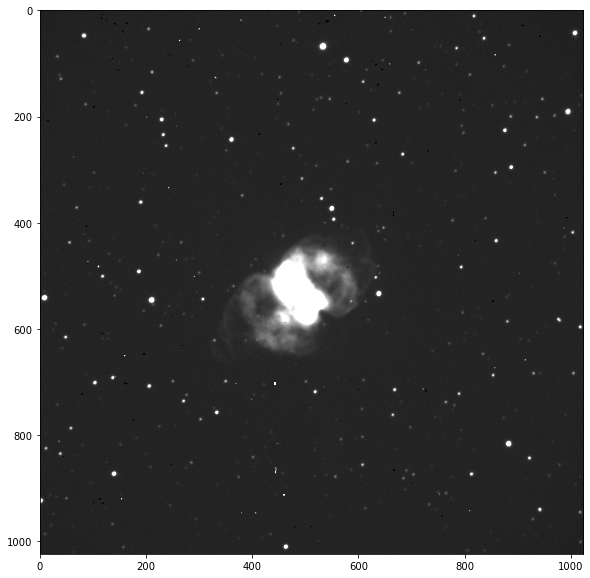

In [21]:
quickplot(Haltere_O, 0.5, 3)

In [23]:
#Saving Files
Haltere_R_fit = fits.PrimaryHDU(Haltere_R, Haltere_1_R_header)
Haltere_R_fit.writeto('./T120/Haltere_R.fits')

Haltere_V_fit = fits.PrimaryHDU(Haltere_V, Haltere_1_V_header)
Haltere_V_fit.writeto('./T120/Haltere_V.fits')

Haltere_B_fit = fits.PrimaryHDU(Haltere_B, Haltere_1_B_header)
Haltere_B_fit.writeto('./T120/Haltere_B.fits')

Haltere_O_fit = fits.PrimaryHDU(Haltere_O, Haltere_1_O_header)
Haltere_O_fit.writeto('./T120/Haltere_OIII.fits')

Haltere_Ha_fit = fits.PrimaryHDU(Haltere_Ha, Haltere_1_Ha_header)
Haltere_Ha_fit.writeto('./T120/Haltere_Ha.fits')

# NGC1491

# T80

In [3]:
bias = fits.open('./T80/calib/bias.fits')
bias_data = 1.0 * (bias[0].data)

dark_4s = fits.open('./T80/calib/dark_4s.fits')
dark4_data = 1.0 * (dark_4s[0].data)

dark_20s = fits.open('./T80/calib/dark_20s.fits')
dark20_data = 1.0 * (dark_20s[0].data)

dark_60s = fits.open('./T80/calib/dark_60s.fits')
dark60_data = 1.0 * (dark_60s[0].data)

dark_300s = fits.open('./T80/calib/dark_300s.fits')
dark300_data = 1.0 * (dark_300s[0].data)

flat_R = fits.open('./T80/calib/Flat_R.fits')
flat_R_data = 1.0 * (flat_R[0].data)

flat_G = fits.open('./T80/calib/Flat_G.fits')
flat_G_data = 1.0 * (flat_G[0].data)

flat_Ha = fits.open('./T80/calib/Flat_Ha.fits')
flat_Ha_data = 1.0 * (flat_Ha[0].data)

In [43]:
dark_240s = fits.open('./T80/calib/dark_nbs_240s.fits')
dark240_data = 1.0 * (dark_240s[0].data)


In [50]:
flat_R = fits.open('./T80/calib/Flat2_R.fits')
flat_R_data = 1.0 * (flat_R[0].data)

flat_G = fits.open('./T80/calib/Flat2_G.fits')
flat_G_data = 1.0 * (flat_G[0].data)

flat_Ha = fits.open('./T80/calib/Flat2_Ha.fits')
flat_Ha_data = 1.0 * (flat_Ha[0].data)

# Crabe

In [5]:
M1_R = fits.open('./T80/SIMO_day2/Crabe/M1_R.fit')
M1_R_header = M1_R[0].header
M1_R_data = 1.0 * M1_R[0].data

M1_G = fits.open('./T80/SIMO_day2/Crabe/M1_G.fit')
M1_G_header = M1_G[0].header
M1_G_data = 1.0 * M1_G[0].data

M1_Ha = fits.open('./T80/SIMO_day2/Crabe/M1_Ha.fit')
M1_Ha_header = M1_Ha[0].header
M1_Ha_data = 1.0 * M1_Ha[0].data

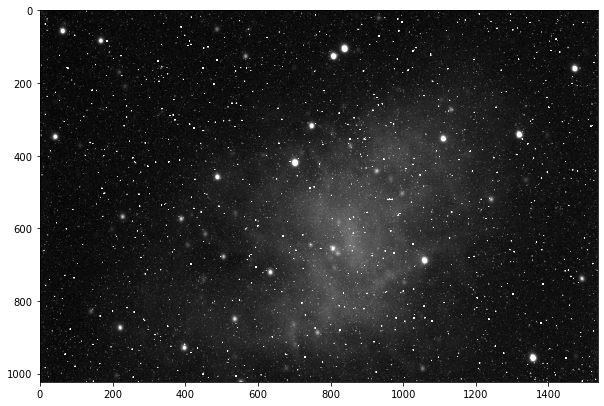

In [83]:
quickplot(M1_G_data, 0.1, 1)

In [71]:
Crabe_R = (M1_R_data - dark240_data  * M1_R_header['EXPTIME'] / 240)  / flat_R_data
#Crabe_R = np.where(Crabe_R>0, Crabe_R, M1_R_data-np.mean(dark240_data)* M1_R_header['EXPTIME'] / 240)  

Crabe_G = (M1_G_data - dark240_data  * M1_G_header['EXPTIME'] / 240) / flat_G_data
#Crabe_G = np.where(Crabe_G>0, Crabe_G, M1_G_data-np.mean(dark240_data)* M1_G_header['EXPTIME'] / 240) 

Crabe_Ha = (M1_Ha_data - dark240_data * M1_Ha_header['EXPTIME'] / 240) / flat_Ha_data
#Crabe_Ha = np.where(Crabe_Ha>0, Crabe_Ha, M1_Ha_data) / flat_Ha_data

In [72]:
quickstats(Crabe_R)

Min: -13509.553637627432
Max: 14740.053261212886
Mean: 201.0007936187404
Median: 193.74823783537974
Stdev: 69.9086821666783


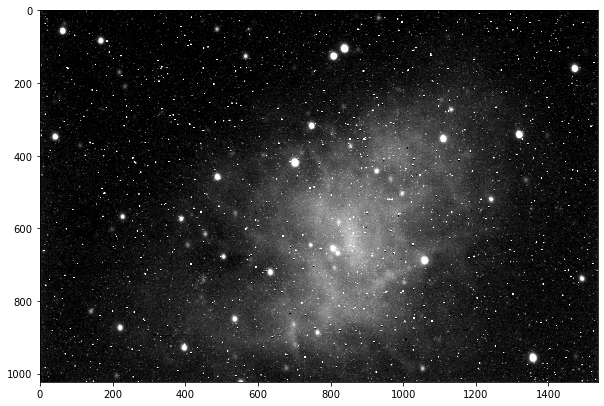

In [82]:
quickplot(Crabe_G, 0.1, 1)

In [80]:
#writing to file
Crabe_R_fit = fits.PrimaryHDU(Crabe_R, M1_R_header)
Crabe_R_fit.writeto('./T80/Crabe_R.fits')

Crabe_G_fit = fits.PrimaryHDU(Crabe_G, M1_G_header)
Crabe_G_fit.writeto('./T80/Crabe_G.fits')

Crabe_Ha_fit = fits.PrimaryHDU(Crabe_Ha, M1_Ha_header)
Crabe_Ha_fit.writeto('./T80/Crabe_Ha.fits')

In [14]:
quickstats(Crabe_R)

Min: -12014.600704225351
Max: 24868.841853035145
Mean: 265.1425662369676
Median: 261.3484325512287
Stdev: 51.48012543124191
